# Student Details

In [1]:
#Student Names: Aman Anand
#Student Reg. No.: 19BCE0521
#Course and Slot: Web Mining - CSE3024 (L39+L40)
#Faculty: Shashank Mouli Satapathy

## Imported Libraries

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import pandas as pd

## Question 1

#### Use the Ford-Fulkerson algorithm to solve the following problem in order to find the maximum flow. Consider A as source and F as Sink node. Present your results as follows:
![Ford-Fulkerson Max Flow Graph](FFMFALABCAT.jpg)
#### Using networkx, 
- Display the initial graphalong with weights 
- Display the updated graphwith weights after each iteration 
- Using pandas, display the augmented path and bottleneck capacity as follows:
![Example](WMLC.jpg)
- Print the maximum flow value

In [36]:
# Ford-Fulkerson algorithm in Python
N = 6
parentTracker = []
INFINITE = 9999999999
def BreadthFirstSearch(residualGraph, source, sink, parentTracker):
    
    queue = []
    visited = []
    
    for i in range(0,N):
        visited.append(0)
    
    queue.append(source)
    visited[source] = True
    parentTracker[source] = -1
    
    while not len(queue) == 0:
        u = queue.pop(0)
        for v in range(0,N):
            if visited[v] == False and residualGraph[u][v] > 0:
                queue.append(v)
                visited[v] = True
                parentTracker[v] = u
                
    if visited[sink]:
        return True
    else:
        return False

 
def print_graph(graph):
    
    maxFlowGraph = nx.DiGraph()
    maxFlowGraph.add_nodes_from('012345')
    L  =[
            ('0', '1', {'capacity': 15, 'flow': 0}),
            ('0', '2', {'capacity': 11, 'flow': 0}),
            ('1', '2', {'capacity': 8, 'flow': 0}),
            ('1', '3', {'capacity': 9, 'flow': 0}),
            ('2', '1', {'capacity': 10, 'flow': 0}),
            ('2', '4', {'capacity': 9, 'flow': 0}),
            ('4', '1', {'capacity': 15, 'flow': 0}),
            ('4', '3', {'capacity': 8, 'flow': 0}),
            ('4', '5', {'capacity': 11, 'flow': 0}),
            ('3', '5', {'capacity': 10, 'flow': 0}),
    ]
    
    maxFlowLayout = {
        '0': [0, 2], '1': [1, 4], '2': [1, 0], '3': [2, 4],
        '4': [2, 0], '5': [3, 2], 
   }
    

    for i in L:
        row = int(i[0])
        col = int(i[1])
        i[2]['flow'] = i[2]['capacity'] - graph[row][col] 
    
    maxFlowGraph.add_edges_from(L)
    #scale of the graph.
    plt.figure(figsize=(10, 6))
    #Turning off the axis.
    plt.axis('off')                                      
    
    #Using networkx functions to plot the graph and add colour.
    nx.draw_networkx_nodes(maxFlowGraph, maxFlowLayout, node_color='black', node_size=450)
    nx.draw_networkx_edges(maxFlowGraph, maxFlowLayout, edge_color='black')
    nx.draw_networkx_labels(maxFlowGraph, maxFlowLayout, font_color='white')
    for nextNode, currentNode, cf in maxFlowGraph.edges(data=True):
        label = '{}/{}'.format(cf['flow'], cf['capacity'])
        color = 'green' if cf['flow'] < cf['capacity'] else 'red'
        x = maxFlowLayout[nextNode][0] * .6 + maxFlowLayout[currentNode][0] * .4
        y = maxFlowLayout[nextNode][1] * .6 + maxFlowLayout[currentNode][1] * .4
        t = plt.text(x, y, label, size=14, color=color, horizontalalignment='center', verticalalignment='center')     
    plt.show()
    


def FordFulkersonAlgorithm(graph, source, sink):
    
    u,v = 0,0
    fin_dict = {}
    residualGraph = graph
    maxFlow = 0
    countvar = 0
    while BreadthFirstSearch(residualGraph, source, sink, parentTracker):
        pathFlow = INFINITE
        v = sink
        countvar += 1
        while not v == source:
            u = parentTracker[v]
            pathFlow = min(pathFlow, residualGraph[u][v])
            v = parentTracker[v]
            
        v = sink
        s = ""
        while not v == source:
            s = " -> " + str(v) + s
            u = parentTracker[v]
            residualGraph[u][v] -= pathFlow
            v = parentTracker[v]
        s = "0" + s
        fin_dict[s] = pathFlow
        maxFlow += pathFlow
        print("\n")
        print("Iteration #" + str(countvar))
        print("\n")
        print("Augmented Path:  "+ s)
        print("Bottleneck Capacity:  " + str(pathFlow))
        print("\nAugmented Graph -->")
        print_graph(residualGraph)
    print("\n\n\n")
    print("Tabular Format of Representation ")
    cols=['Augmented Path','Bottleneck Capacity']
    df = pd.DataFrame(list(fin_dict.items()), columns = cols)
    print(df)
    return maxFlow
    
def main():
    graph = \
        [
            [0, 15, 11, 0, 0, 0],
            [0, 0, 8, 0, 9, 0],
            [0, 10, 0, 9, 0, 0],
            [0, 15, 0, 0, 8, 11],
            [0, 0, 0, 0, 0, 10],
            [0, 0, 0, 0, 0, 0]
        ]
        
    for i in range(0,N):
        parentTracker.append(0)
        
    print("\nThe Maximum Possible Flow is: {}".format(FordFulkersonAlgorithm(graph, 0, N - 1)))



Iteration #1


Augmented Path:  0 -> 1 -> 4 -> 5
Bottleneck Capacity:  9

Augmented Graph -->


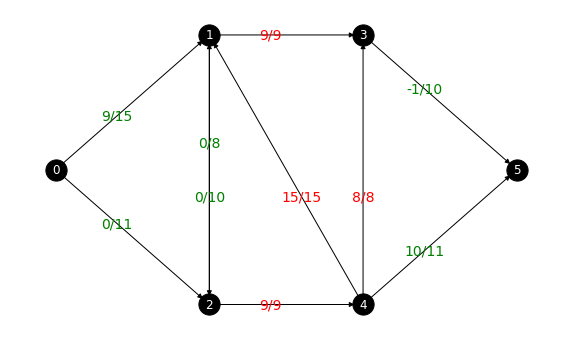



Iteration #2


Augmented Path:  0 -> 2 -> 3 -> 5
Bottleneck Capacity:  9

Augmented Graph -->


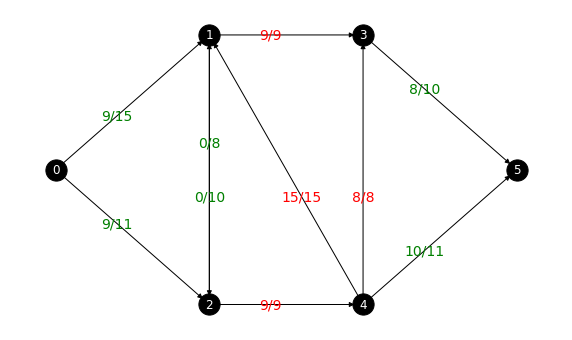





Tabular Format of Representation 
     Augmented Path  Bottleneck Capacity
0  0 -> 1 -> 4 -> 5                    9
1  0 -> 2 -> 3 -> 5                    9

The Maximum Possible Flow is: 18


In [37]:
main()